In [25]:
import pickle
from tensorflow_ver.store_vectors import load_img, vectorized, euclid_dis


from keras.applications.vgg16 import VGG16
from keras.models import Model

vgg16_model = VGG16(weights="imagenet")
extract_model = Model(inputs=vgg16_model.inputs, outputs=vgg16_model.get_layer("fc1").output)

extract_model.summary()

vectors = pickle.load(open("./weights/vectors.pkl", "rb"))
paths = pickle.load(open("./weights/paths.pkl", "rb"))

database = zip(vectors, paths)

query_img_pth = "./assets/lion_1.jpg"

query_img = load_img(query_img_pth)
query_img_vector = vectorized(query_img, extract_model)


distances = [(euclid_dis(query_img_vector, vector), path) for vector, path in database]




Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [26]:
copy_dist = distances.copy()

In [27]:
copy_dist

[(1.1340913, 'src/data/dataset/0.jpg'),
 (1.1327537, 'src/data/dataset/1.jpg'),
 (1.0534142, 'src/data/dataset/10.jpg'),
 (0.69830304, 'src/data/dataset/100.jpg'),
 (1.1236423, 'src/data/dataset/1000.jpg'),
 (1.1088951, 'src/data/dataset/1001.jpg'),
 (1.1623216, 'src/data/dataset/1002.jpg'),
 (0.78033185, 'src/data/dataset/1003.jpg'),
 (1.2720785, 'src/data/dataset/1004.jpg'),
 (1.1438836, 'src/data/dataset/1005.jpg'),
 (1.217457, 'src/data/dataset/1006.jpg'),
 (1.0910393, 'src/data/dataset/1007.jpg'),
 (0.88294226, 'src/data/dataset/1008.jpg'),
 (1.2325215, 'src/data/dataset/1009.jpg'),
 (1.2407874, 'src/data/dataset/101.jpg'),
 (1.2886746, 'src/data/dataset/1010.jpg'),
 (0.8032408, 'src/data/dataset/1011.jpg'),
 (1.140767, 'src/data/dataset/1012.jpg'),
 (1.088776, 'src/data/dataset/1013.jpg'),
 (1.0853058, 'src/data/dataset/1014.jpg'),
 (1.1567876, 'src/data/dataset/1015.jpg'),
 (1.1121925, 'src/data/dataset/1016.jpg'),
 (1.2295216, 'src/data/dataset/1017.jpg'),
 (1.0912607, 'src/dat

In [28]:
copy_dist.sort(key= lambda x : x[0])

In [29]:
copy_dist

[(0.5933275, 'src/data/dataset/623.jpg'),
 (0.5995544, 'src/data/dataset/21.jpg'),
 (0.6177693, 'src/data/dataset/3831.jpg'),
 (0.62436646, 'src/data/dataset/4729.jpg'),
 (0.6250945, 'src/data/dataset/387.jpg'),
 (0.6345336, 'src/data/dataset/4300.jpg'),
 (0.63751566, 'src/data/dataset/1255.jpg'),
 (0.64633685, 'src/data/dataset/476.jpg'),
 (0.64673, 'src/data/dataset/3509.jpg'),
 (0.6470529, 'src/data/dataset/4245.jpg'),
 (0.65230566, 'src/data/dataset/2088.jpg'),
 (0.65351564, 'src/data/dataset/2775.jpg'),
 (0.6535249, 'src/data/dataset/739.jpg'),
 (0.6547118, 'src/data/dataset/3096.jpg'),
 (0.6568745, 'src/data/dataset/2301.jpg'),
 (0.657893, 'src/data/dataset/1586.jpg'),
 (0.6586408, 'src/data/dataset/3728.jpg'),
 (0.6602201, 'src/data/dataset/2202.jpg'),
 (0.6602962, 'src/data/dataset/4652.jpg'),
 (0.6615664, 'src/data/dataset/3883.jpg'),
 (0.6629579, 'src/data/dataset/572.jpg'),
 (0.66375136, 'src/data/dataset/393.jpg'),
 (0.66471434, 'src/data/dataset/984.jpg'),
 (0.66472137, 's

In [30]:
top_9 = copy_dist[:9]

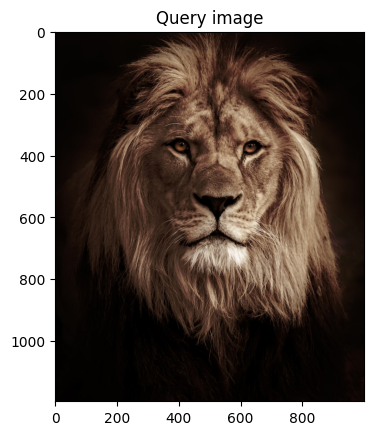

In [31]:
import cv2 as cv
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

img = cv.imread(query_img_pth, cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.title("Query image")
plt.imshow(img)

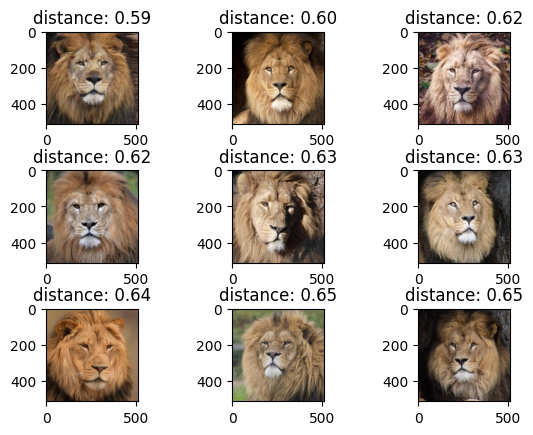

In [43]:
f, axarr = plt.subplots(3, 3)


count = 0
for idx, (distance, path) in enumerate(top_9):
    data_img = cv.imread(path.replace("src/", "./"))
    data_img = cv.cvtColor(data_img, cv.COLOR_BGR2RGB)
    ax = axarr[int(count/3), (idx+3)%3]
    ax.imshow(data_img)
    ax.set_title(f"distance: {distance:.2f}")
    count +=1
    
f.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()